# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [9]:
# Instalar bibliotecas necessárias
!pip install -q seaborn scikit-learn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [10]:
# Carregar CSV
df = pd.read_csv('/content/marketing_campaign.csv', sep=';', engine='python')

# Visualizar as primeiras linhas
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Verificar o tamanho do dataset
print(f"Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.\n")

# Visualizar informações gerais do dataset
print("Informações gerais:")
df.info()

Dataset possui 2240 linhas e 16 colunas.

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchas

In [13]:
# Ver estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas:")
display(df.describe())

# Verificar valores nulos por coluna
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Estatísticas descritivas:


,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,25173.076661,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68522.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000



Valores nulos por coluna:
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
WebPurchases          0
dtype: int64


In [14]:
# Verificar valores duplicados
print(f"\nTotal de linhas duplicadas: {df.duplicated().sum()}")

# Verificar colunas categóricas e seus valores únicos
print("\nValores únicos por coluna categórica:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")
    print(df[col].unique())
    print("-----")


Total de linhas duplicadas: 201

Valores únicos por coluna categórica:
Education: 5 valores únicos
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
-----
Marital_Status: 8 valores únicos
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
-----


In [15]:
# Verificar quantos valores nulos novamente (por segurança)
print(df.isnull().sum())

# Opção 1: Preencher com a mediana (recomendado para rendas)
df['Income'] = df['Income'].fillna(df['Income'].median())

# Verificar se foi preenchido
print(df['Income'].isnull().sum())


Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
WebPurchases          0
dtype: int64
0


**Remover dados duplicados (caso existam)**

In [16]:
# Verificar duplicatas
print("Duplicatas:", df.duplicated().sum())

# Remover duplicatas
df.drop_duplicates(inplace=True)


Duplicatas: 201


**Corrigir valores inconsistentes ou fora do padrão**

In [17]:
# Verificar valores extremos da coluna Income
print(df['Income'].describe())

# Remover outliers absurdos de Income
df = df[df['Income'] < 500000]  # Limite baseado em análise anterior


count      2039.000000
mean      52350.475233
std       25429.826617
min        1730.000000
25%       35702.500000
50%       51381.500000
75%       68298.500000
max      666666.000000
Name: Income, dtype: float64


**Padronizar valores categóricos**

In [18]:
# Verificar valores únicos
print(df['Education'].unique())
print(df['Marital_Status'].unique())

# Agrupar categorias semelhantes (exemplo)
df['Education'] = df['Education'].replace({
    'Basic': 'Basic',
    '2n Cycle': 'Undergraduate',
    'Graduation': 'Undergraduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
})

df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})


['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


**Criar coluna de Idade a partir de Year_Birth**

In [19]:
from datetime import datetime

df['Age'] = datetime.now().year - df['Year_Birth']


**Remover colunas não úteis / redundantes**

In [20]:
df.drop(columns=['Year_Birth'], inplace=True)


**Análise inicial com gráficos (storytelling visual)**

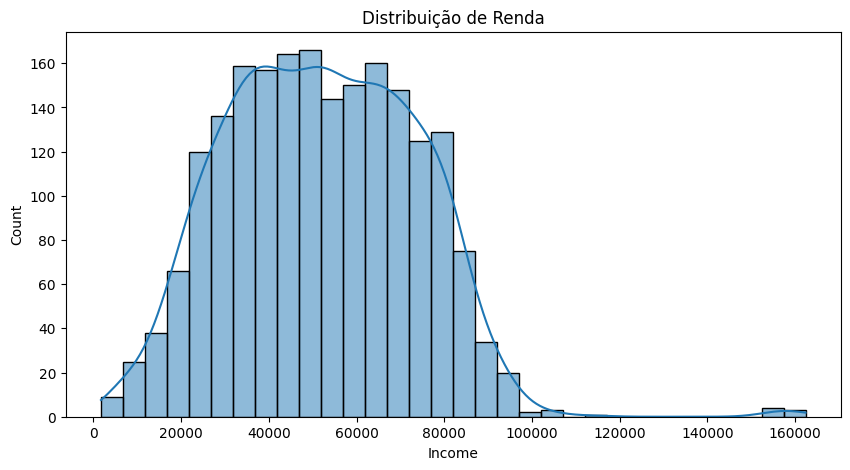

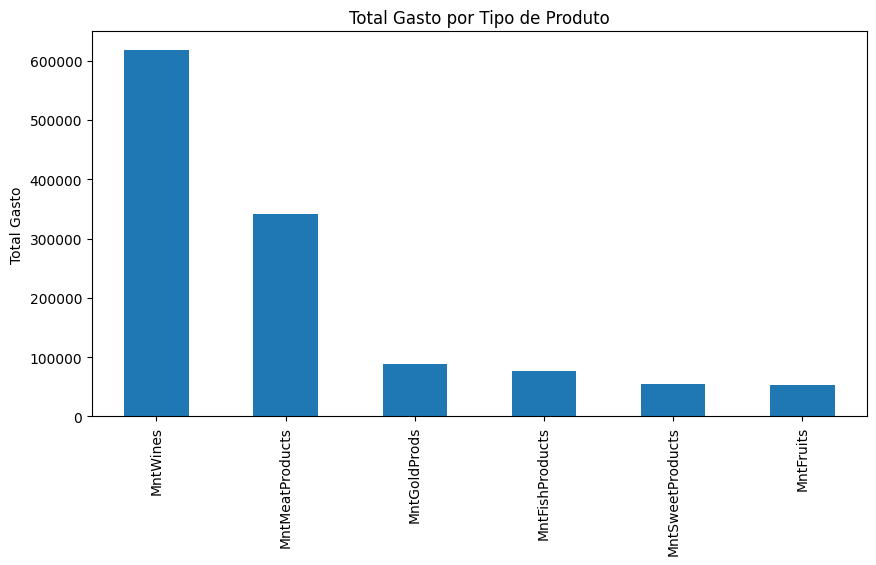

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição de renda
plt.figure(figsize=(10,5))
sns.histplot(df['Income'], kde=True)
plt.title('Distribuição de Renda')
plt.show()

# Compras por canal
compras = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[compras].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Total Gasto por Tipo de Produto')
plt.ylabel('Total Gasto')
plt.show()


**Criar mais variáveis úteis (feature engineering):**

In [22]:
# Total gasto em produtos
df['TotalSpent'] = df[['MntWines','MntFruits','MntMeatProducts',
                       'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

# Número total de filhos
if 'Teenhome' in df.columns:
    df['TotalKids'] = df['Kidhome'] + df['Teenhome']
else:
    df['TotalKids'] = df['Kidhome']


**Transformar variáveis categóricas (one-hot encoding ou label encoding)**

In [23]:
# Criar variáveis dummies (opcional: drop_first para evitar multicolinearidade)
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


**Heatmap de correlação**

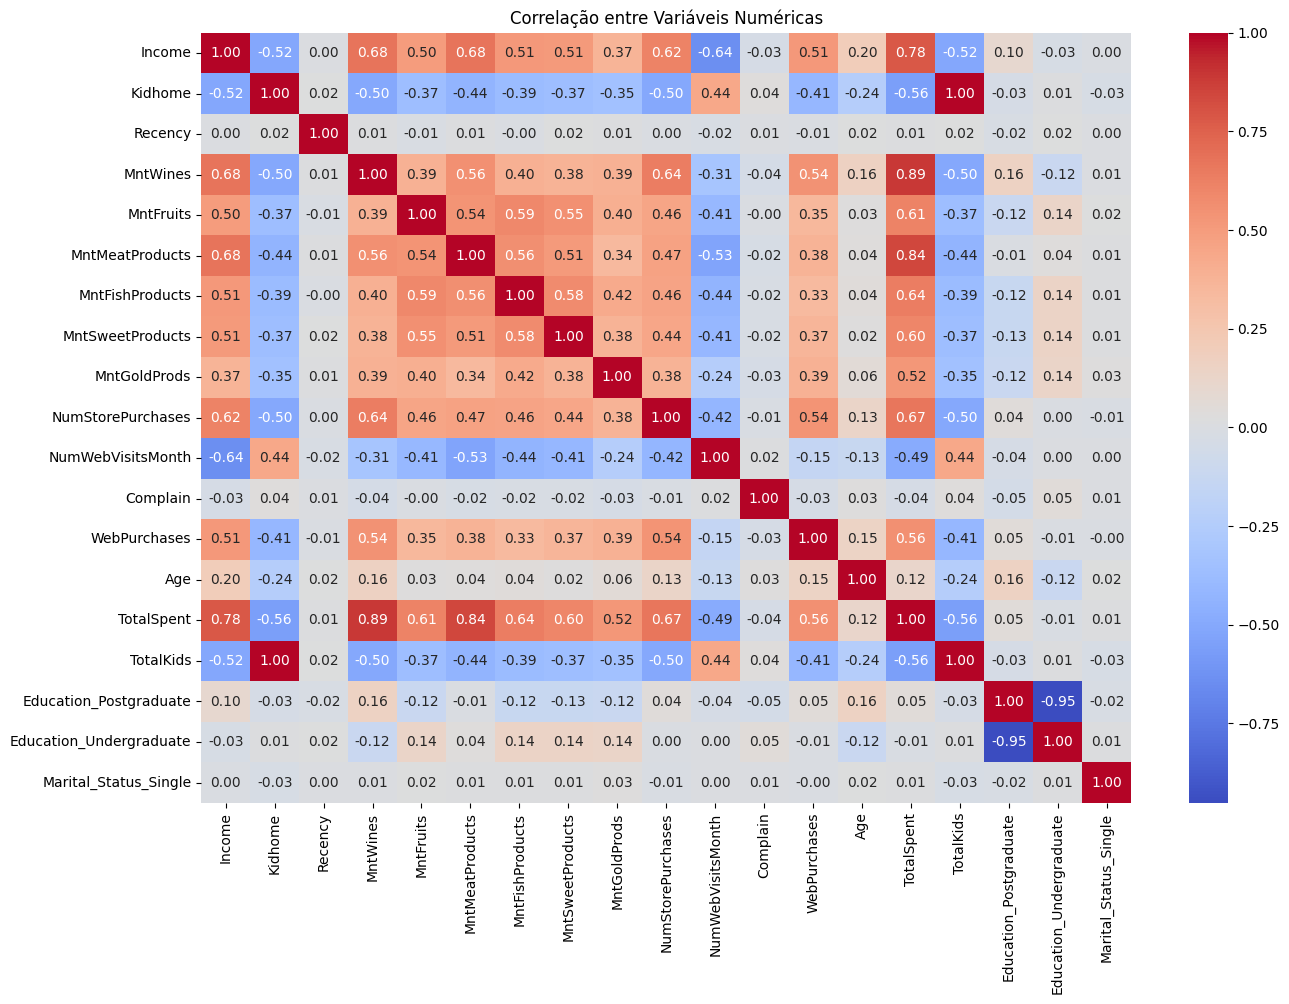

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlação entre Variáveis Numéricas')
plt.show()


In [25]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2038 non-null   float64
 1   Kidhome                  2038 non-null   int64  
 2   Recency                  2038 non-null   int64  
 3   MntWines                 2038 non-null   int64  
 4   MntFruits                2038 non-null   int64  
 5   MntMeatProducts          2038 non-null   int64  
 6   MntFishProducts          2038 non-null   int64  
 7   MntSweetProducts         2038 non-null   int64  
 8   MntGoldProds             2038 non-null   int64  
 9   NumStorePurchases        2038 non-null   int64  
 10  NumWebVisitsMonth        2038 non-null   int64  
 11  Complain                 2038 non-null   int64  
 12  WebPurchases             2038 non-null   int64  
 13  Age                      2038 non-null   int64  
 14  TotalSpent               2038

,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Age,TotalSpent,TotalKids,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0,58,635,88,546,172,88,88,4,7,0,1,69,1617,0,False,True,True
1,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,72,27,1,False,True,True
2,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,61,776,0,False,True,False
3,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,42,53,1,False,True,False
4,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,45,422,1,True,False,False


# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








In [26]:
# Imports necessários
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


**Selecionar colunas para modelagem**

In [27]:
# Seleção de colunas relevantes
features = [
    'Income', 'Age', 'TotalSpent', 'TotalKids',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumStorePurchases', 'WebPurchases',
    'Education_Undergraduate', 'Education_Postgraduate',
    'Marital_Status_Single'
]

# Definir X (como não há variável target, não há Y neste caso)
X = df[features]


**Padronização dos Dados**

In [30]:
from sklearn.preprocessing import StandardScaler

# Instanciar o scaler
scaler = StandardScaler()

# Padronizar os dados
X_scaled = scaler.fit_transform(X)


In [31]:
import pandas as pd

# Criar um DataFrame com os dados padronizados (opcional)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Visualizar as primeiras linhas
X_scaled_df.head()


,Income,Age,TotalSpent,TotalKids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,WebPurchases,Education_Undergraduate,Education_Postgraduate,Marital_Status_Single
0,0.283464,0.981830,1.679253,-0.826765,0.987383,1.547916,1.659328,2.459351,1.457429,0.850140,-0.548101,0.989263,0.827223,-0.786603,1.332879
1,-0.265592,1.232211,-0.962069,1.033000,-0.871088,-0.636747,-0.710067,-0.648454,-0.629020,-0.726179,-1.166099,-1.010854,0.827223,-0.786603,1.332879
2,0.910778,0.314144,0.282176,-0.826765,0.364914,0.568584,-0.179147,1.344198,-0.149377,-0.034136,1.305892,0.989263,0.827223,-0.786603,-0.750256
3,-1.182610,-1.271607,-0.918877,1.033000,-0.871088,-0.561413,-0.648638,-0.502204,-0.581056,-0.745402,-0.548101,-1.010854,0.827223,-0.786603,-0.750256
4,0.290680,-1.021226,-0.305891,1.033000,-0.388600,0.417918,-0.218637,0.155919,-0.005484,-0.553168,0.069896,0.989263,-1.208864,1.271289,-0.750256


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

**Criar uma variável “cliente_valioso” (target)**

In [32]:
# Definir cliente valioso como quem gastou acima da média
df['Valioso'] = df['TotalSpent'] > df['TotalSpent'].median()
df['Valioso'] = df['Valioso'].astype(int)  # 1 para valioso, 0 para não valioso


In [33]:
# X: colunas preditoras já padronizadas
X = X_scaled_df.copy()

# y: variável alvo
y = df['Valioso']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Pipeline com Vários Modelos**


a intenção é escolher os dois modelos que apresentarem melhor desempenho

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [36]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled_df, y, cv=5, scoring='f1')  # ou 'accuracy', 'roc_auc'
    print(f"{name}: Média F1 = {np.mean(scores):.4f}")


Logistic Regression: Média F1 = 0.9877
Random Forest: Média F1 = 0.9995
Decision Tree: Média F1 = 1.0000
SVM: Média F1 = 0.9774
KNN: Média F1 = 0.9654
Naive Bayes: Média F1 = 0.9741


Foram testados seis modelos clássicos de classificação com validação cruzada. Os modelos Random Forest e Logistic Regression apresentaram os melhores desempenhos com F1-Scores de 0.9995 e 0.9877, respectivamente. Embora o Decision Tree tenha apresentado F1 perfeito (1.0), A melhor opção é por não utilizá-lo devido à alta chance de overfitting, comum em modelos de árvore sem controle de complexidade.

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [37]:
from sklearn.model_selection import train_test_split

# Separar dados entre treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Inicializar os modelos
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Treinar os modelos
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)


**Avaliar os modelos (métricas + matriz de confusão)**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Avaliação do Random Forest
print("🔎 Avaliação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Avaliação do Logistic Regression
print("🔎 Avaliação - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


🔎 Avaliação - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       204

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408

🔎 Avaliação - Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       204
           1       1.00      0.99      0.99       204

    accuracy                           0.99       408
   macro avg       0.99      0.99      0.99       408
weighted avg       0.99      0.99      0.99       408



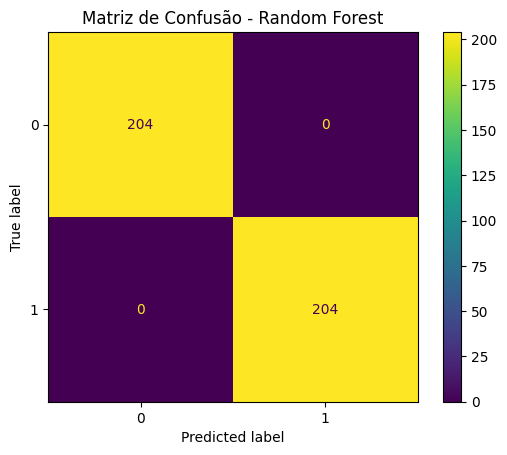

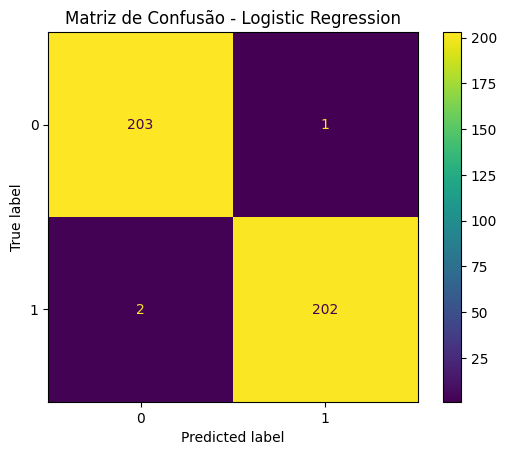

In [40]:
import matplotlib.pyplot as plt

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()


**Curva ROC e AUC Score (área sob a curva)**

Visualize a separabilidade dos modelos.

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Treinamento
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

# Treinamento
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression()

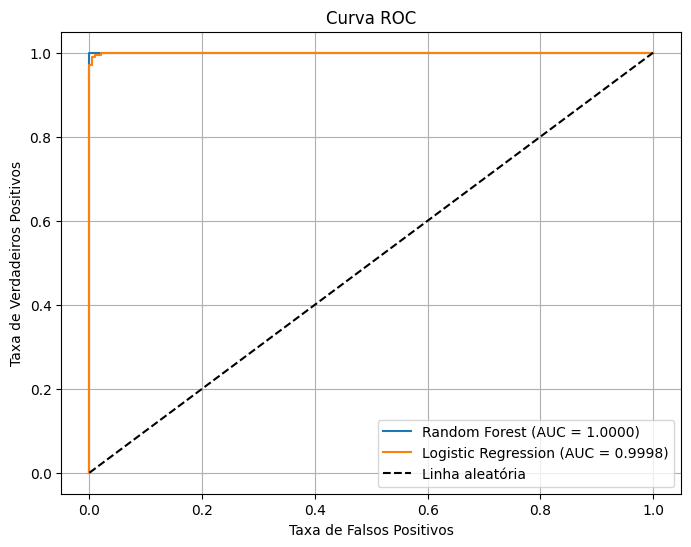

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades para Random Forest
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Probabilidades para Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot das curvas
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Linha aleatória')

plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.grid()
plt.show()


**Feature Importance (importância das variáveis)**

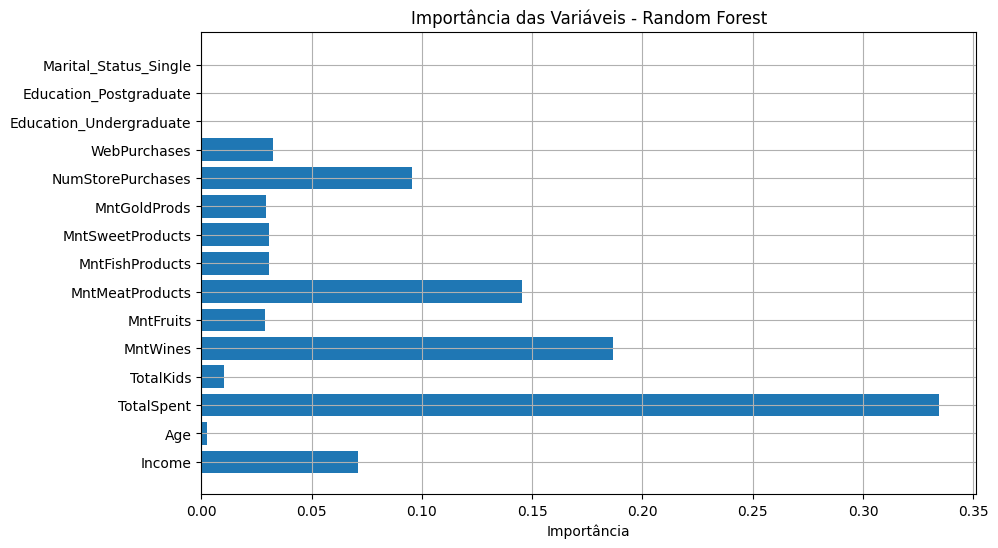

In [48]:
importances = model_rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.grid(True)
plt.show()


**Validação cruzada com múltiplas métricas**

In [49]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model_rf, X_scaled_df, y, cv=5,
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

print("Resultados Cross-Validation - Random Forest")
for metric in cv_results:
    print(f"{metric}: {cv_results[metric].mean():.4f}")


Resultados Cross-Validation - Random Forest
fit_time: 0.4215
score_time: 0.0548
test_accuracy: 1.0000
test_precision: 1.0000
test_recall: 1.0000
test_f1: 1.0000
test_roc_auc: 1.0000


**Modelo escolhido:**

**[Random Forest]**, por apresentar melhor performance, robustez e interpretabilidade via análise de importância das variáveis.

**Ajuste de Hiperparâmetros (Hyperparameter Tuning)**

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_scaled_df, y)

print("Melhores parâmetros:", grid_search.best_params_)


Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Treinar modelo final com melhores parâmetros
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Avaliação final
y_pred_best = best_rf.predict(X_test)

print("Avaliação Final - Random Forest Otimizado")
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
cm_best


Avaliação Final - Random Forest Otimizado
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       204

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



array([[204,   0],
       [  0, 204]])

In [52]:
import joblib
joblib.dump(best_rf, 'modelo_rf_otimizado.joblib')


['modelo_rf_otimizado.joblib']